In [1]:
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Exam task 1:
- Download dataset KEGG Metabolic Relation Network (Directed) from https://archive.ics.uci.edu/ml/datasets/KEGG+Metabolic+Relation+Network+%28Directed%29, 
- load dataset to pandas, column names are ['Pathway', 'Nodes integer (min:2, max:116) ', 'Edges', 'Connected Components', 'Network Diameter', 'Network Radius', 'Shortest Path', 'Characteristic Path Length', 'Avg.num.Neighbours', 'Isolated Nodes', 'Number of Self Loops', 'Multi-edge Node Pair', 'NeighborhoodConnectivity', 'Outdegree', 'Stress', 'SelfLoops', 'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality', 'Indegree', 'Eccentricity', 'ClosenessCentrality', 'AverageShortestPathLength', 'ClusteringCoefficient']
- Join all integer columns into text column and drop them. 
- Form Target column as Avg.num.Neighbours>median(Avg.num.Neighbours)
- draw histograms and distributions for all numeric variables, and store them in .png file
- split the dataset to train and test 
- store yaml file with data on dataset split origins and loading specific

### T1: Download dataset KEGG Metabolic Relation Network (Directed)

In [2]:
#done

### T2: Load dataset to pandas and name the columns

In [3]:
kegg_df = pd.read_csv('./data/kegg.csv')

In [87]:
len(['Pathway', 'Nodes integer (min:2, max:116) ', 'Edges', 'Connected Components', 'Network Diameter', 'Network Radius', 'Shortest Path', 'Characteristic Path Length', 'Avg.num.Neighbours', 'Isolated Nodes', 'Number of Self Loops', 'Multi-edge Node Pair', 'NeighborhoodConnectivity', 'Outdegree', 'Stress', 'SelfLoops', 'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality', 'Indegree', 'Eccentricity', 'ClosenessCentrality', 'AverageShortestPathLength', 'ClusteringCoefficient'])

24

In [89]:
kegg_df.columns = ['Pathway', 'Nodes integer (min:2, max:116) ', 'Edges', 'Connected Components', 'Network Diameter', 'Network Radius', 'Shortest Path', 'Characteristic Path Length', 'Avg.num.Neighbours', 'Isolated Nodes', 'Number of Self Loops', 'Multi-edge Node Pair', 'NeighborhoodConnectivity', 'Outdegree', 'Stress', 'SelfLoops', 'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality', 'Indegree', 'Eccentricity', 'ClosenessCentrality', 'AverageShortestPathLength', 'ClusteringCoefficient']
kegg_df

%store kegg_df

Stored 'kegg_df' (DataFrame)


### T3: Join all integer columns into text column and drop them.

In [6]:
kegg_df.head(3)

,Pathway,"Nodes integer (min:2, max:116)",Edges,Connected Components,Network Diameter,Network Radius,Shortest Path,Characteristic Path Length,Avg.num.Neighbours,Isolated Nodes,...,Stress,SelfLoops,PartnerOfMultiEdgedNodePairs,EdgeCount,BetweennessCentrality,Indegree,Eccentricity,ClosenessCentrality,AverageShortestPathLength,ClusteringCoefficient
0,aac00020,27,52,2,10,1,226,3.411504,3.851852,0,...,26.629630,0,0.000000,3.851852,0.036567,1.925926,4.074074,0.399880,2.168687,0.290197
1,aac00030,26,53,2,6,1,202,2.732673,3.769231,0,...,14.961538,0,0.230769,4.076923,0.026604,2.038462,3.115385,0.430368,1.864288,0.230311
2,aac00040,20,28,1,8,1,65,2.523077,2.600000,0,...,4.950000,0,0.100000,2.800000,0.014474,1.400000,2.450000,0.481044,1.492500,0.210000


In [7]:
kegg_df.dtypes;

# Nodes integer (min:2, max:116)       int64
# Edges                                int64
# Connected Components                 int64
# Network Diameter                     int64
# Network Radius                       int64
# Shortest Path                        int64
# Isolated Nodes                       int64
# Number of Self Loops                 int64
# Multi-edge Node Pair                 int64
# SelfLoops                            int64

In [8]:
#kegg_df = kegg_df.drop(['Nodes integer (min:2, max:116) ', 'Edges', 'Connected Components', 'Network Diameter', 'Network Radius', 'Shortest Path', 'Isolated Nodes', 'Number of Self Loops', 'Multi-edge Node Pair', 'SelfLoops')

# kegg_df = kegg_df['Nodes integer (min:2, max:116)'].drop()
# kegg_df= kegg_df.drop(['Nodes integer (min:2, max:116)', 'Edges', 'Connected Components', 'Network Diameter', 'Network Radius', 'Shortest Path', 'Isolated Nodes', 'Number of Self Loops', 'Multi-edge Node Pair', 'SelfLoops'], axis=1)


# kegg_df.drop(['Nodes integer (min:2, max:116)'], axis=1)

kegg_df = kegg_df.drop(kegg_df.columns[1], axis=1)
kegg_df = kegg_df.drop(['Edges', 'Connected Components', 'Network Diameter', 'Network Radius', 'Shortest Path', 'Isolated Nodes', 'Number of Self Loops', 'Multi-edge Node Pair', 'SelfLoops'], axis=1)

kegg_df

%store kegg_df

Stored 'kegg_df' (DataFrame)


### T1: Form Target column as Avg.num.Neighbours>median(Avg.num.Neighbours)

In [9]:
# Create target column

kegg_df['Many_Neighbours'] = kegg_df['Avg.num.Neighbours'] > np.median(kegg_df['Avg.num.Neighbours'])

# I like binary targets

kegg_df['Many_Neighbours'] = kegg_df['Many_Neighbours'].apply(lambda x: 1 if x == True  else 0)

%store kegg_df

kegg_df

Stored 'kegg_df' (DataFrame)


,Pathway,Characteristic Path Length,Avg.num.Neighbours,NeighborhoodConnectivity,Outdegree,Stress,PartnerOfMultiEdgedNodePairs,EdgeCount,BetweennessCentrality,Indegree,Eccentricity,ClosenessCentrality,AverageShortestPathLength,ClusteringCoefficient,Many_Neighbours
0,aac00020,3.411504,3.851852,4.516696,1.925926,26.629630,0.000000,3.851852,0.036567,1.925926,4.074074,0.399880,2.168687,0.290197,1
1,aac00030,2.732673,3.769231,4.286493,2.038462,14.961538,0.230769,4.076923,0.026604,2.038462,3.115385,0.430368,1.864288,0.230311,1
2,aac00040,2.523077,2.600000,2.936667,1.400000,4.950000,0.100000,2.800000,0.014474,1.400000,2.450000,0.481044,1.492500,0.210000,1
3,aac00051,1.858824,4.400000,5.284206,2.200000,5.000000,0.000000,4.400000,0.026740,2.200000,2.333333,0.518691,1.532326,0.267222,1
4,aac00052,2.133333,3.000000,3.537037,1.611111,6.944444,0.222222,3.222222,0.061111,1.611111,1.944444,0.473544,1.444753,0.253571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53407,zmo00770,2.112903,2.500000,3.001667,1.250000,5.550000,0.000000,2.500000,0.043910,1.250000,1.650000,0.377880,1.077955,0.157500,1
53408,zmo00780,1.666667,1.500000,1.750000,0.750000,1.000000,0.000000,1.500000,0.166667,0.750000,1.500000,0.541667,1.125000,0.000000,0
53409,zmo00785,1.500000,2.400000,2.533333,1.200000,1.000000,0.000000,2.400000,0.083333,1.200000,1.600000,0.593333,1.150000,0.166667,1
53410,zmo00790,1.666667,2.250000,2.859375,1.250000,2.250000,0.250000,2.500000,0.018056,1.250000,1.375000,0.454412,0.923438,0.188542,1


### T1: draw histograms and distributions for all numeric variables, and store them in .png file

In [10]:
kegg_df.columns

features_numeric = ['Pathway', 'Characteristic Path Length', 'Avg.num.Neighbours',
       'NeighborhoodConnectivity', 'Outdegree', 'Stress',
       'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality',
       'Indegree', 'Eccentricity', 'ClosenessCentrality',
       'AverageShortestPathLength', 'ClusteringCoefficient']

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

kegg_df_num = kegg_df.select_dtypes(include=numerics)

kegg_df_num

,Characteristic Path Length,Avg.num.Neighbours,NeighborhoodConnectivity,Outdegree,Stress,PartnerOfMultiEdgedNodePairs,EdgeCount,BetweennessCentrality,Indegree,Eccentricity,ClosenessCentrality,AverageShortestPathLength,ClusteringCoefficient,Many_Neighbours
0,3.411504,3.851852,4.516696,1.925926,26.629630,0.000000,3.851852,0.036567,1.925926,4.074074,0.399880,2.168687,0.290197,1
1,2.732673,3.769231,4.286493,2.038462,14.961538,0.230769,4.076923,0.026604,2.038462,3.115385,0.430368,1.864288,0.230311,1
2,2.523077,2.600000,2.936667,1.400000,4.950000,0.100000,2.800000,0.014474,1.400000,2.450000,0.481044,1.492500,0.210000,1
3,1.858824,4.400000,5.284206,2.200000,5.000000,0.000000,4.400000,0.026740,2.200000,2.333333,0.518691,1.532326,0.267222,1
4,2.133333,3.000000,3.537037,1.611111,6.944444,0.222222,3.222222,0.061111,1.611111,1.944444,0.473544,1.444753,0.253571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53407,2.112903,2.500000,3.001667,1.250000,5.550000,0.000000,2.500000,0.043910,1.250000,1.650000,0.377880,1.077955,0.157500,1
53408,1.666667,1.500000,1.750000,0.750000,1.000000,0.000000,1.500000,0.166667,0.750000,1.500000,0.541667,1.125000,0.000000,0
53409,1.500000,2.400000,2.533333,1.200000,1.000000,0.000000,2.400000,0.083333,1.200000,1.600000,0.593333,1.150000,0.166667,1
53410,1.666667,2.250000,2.859375,1.250000,2.250000,0.250000,2.500000,0.018056,1.250000,1.375000,0.454412,0.923438,0.188542,1


In [12]:
kegg_df_num.columns

features_numeric = ['Characteristic Path Length', 'Avg.num.Neighbours',
       'NeighborhoodConnectivity', 'Outdegree', 'Stress',
       'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality',
       'Indegree', 'Eccentricity', 'ClosenessCentrality',
       'AverageShortestPathLength', 'ClusteringCoefficient']

In [13]:
no_of_plots = len(features_numeric)

no_of_plots

13

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

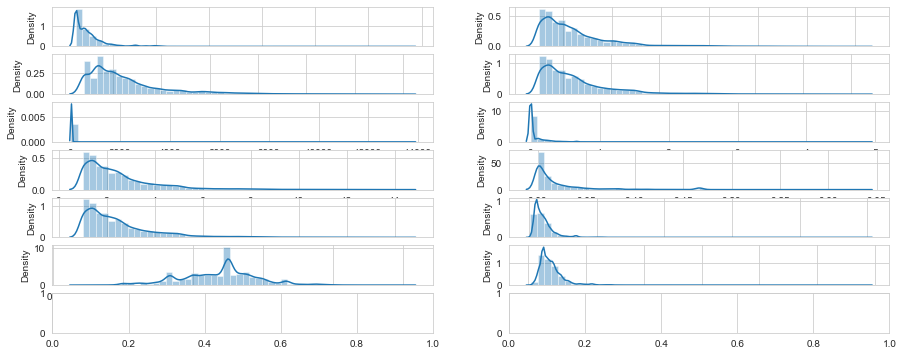

In [14]:
import warnings
warnings.filterwarnings('ignore')

ax = list(range(no_of_plots))
fig, ((ax[0], ax[1]), (ax[2], ax[3]), (ax[4], ax[5]),\
      (ax[6], ax[7]), (ax[8], ax[9]), (ax[10], ax[11]),\
      (ax[12])) = plt.subplots(
                                ncols=2,
                                nrows=7,
                                figsize=(15, 6))

for i in range(no_of_plots):
    sns.distplot(kegg_df_num[features_numeric[i]], ax = ax[i])

### T1: split the dataset to train and test

In [15]:
%store -r kegg_df
kegg_df.head(1)

,Pathway,Characteristic Path Length,Avg.num.Neighbours,NeighborhoodConnectivity,Outdegree,Stress,PartnerOfMultiEdgedNodePairs,EdgeCount,BetweennessCentrality,Indegree,Eccentricity,ClosenessCentrality,AverageShortestPathLength,ClusteringCoefficient,Many_Neighbours
0,aac00020,3.411504,3.851852,4.516696,1.925926,26.62963,0.0,3.851852,0.036567,1.925926,4.074074,0.39988,2.168687,0.290197,1


In [16]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [17]:
import re
import pickle
from sklearn.model_selection import train_test_split

features = ['Characteristic Path Length', 'Avg.num.Neighbours',
           'NeighborhoodConnectivity', 'Outdegree', 'Stress',
           'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality',
           'Indegree', 'Eccentricity', 'ClosenessCentrality',
           'AverageShortestPathLength', 'ClusteringCoefficient']

target = ['Many_Neighbours']

X_train, X_test, y_train, y_test = train_test_split(kegg_df[features], \
                                                    kegg_df[target], \
                                                    test_size=0.2, \
                                                    random_state=2020)

pickle.dump(train_test_split(kegg_df[features], \
                                kegg_df[target], \
                                test_size=0.2, \
                                random_state=2020), open('./data/split.pickle', 'wb'))

In [18]:
X_train, X_test, y_train, y_test = pickle.load(open('./data/split.pickle', 'rb'))

X_train

,Characteristic Path Length,Avg.num.Neighbours,NeighborhoodConnectivity,Outdegree,Stress,PartnerOfMultiEdgedNodePairs,EdgeCount,BetweennessCentrality,Indegree,Eccentricity,ClosenessCentrality,AverageShortestPathLength,ClusteringCoefficient
3558,1.000000,1.200000,1.400000,0.600000,0.000000,0.000000,1.200000,0.000000,0.600000,0.400000,0.400000,0.400000,0.000000
14068,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000
50054,1.242424,3.028571,3.921769,1.571429,0.457143,0.114286,3.142857,0.016936,1.571429,0.685714,0.429478,0.587381,0.201156
48381,1.000000,1.333333,1.666667,0.666667,0.000000,0.000000,1.333333,0.000000,0.666667,0.333333,0.333333,0.333333,0.000000
51286,1.333333,2.000000,2.181818,1.090909,0.454545,0.181818,2.181818,0.054113,1.090909,1.000000,0.536797,0.795455,0.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18523,2.052083,3.268293,3.700058,1.682927,7.780488,0.097561,3.365854,0.013156,1.682927,2.048780,0.447753,1.327556,0.186992
44739,1.315789,2.166667,2.583333,1.083333,0.500000,0.000000,2.166667,0.016667,1.083333,0.750000,0.516369,0.695833,0.212500
47734,1.214286,1.692308,2.403846,0.846154,0.230769,0.000000,1.692308,0.046154,0.846154,0.769231,0.564103,0.692308,0.083333
40259,1.000000,1.333333,1.666667,0.666667,0.000000,0.000000,1.333333,0.000000,0.666667,0.333333,0.333333,0.333333,0.000000


### T1: store yaml file with data on dataset split origins and loading specific

In [20]:
%%writefile ./data/config.yaml

Description: Split for ./data/new_tweets/kegg_df.csv
    
test_size: 0.2
random_state: 2020

Writing ./data/config.yaml


In [22]:
X_train, X_test, y_train, y_test = pickle.load(open('./data/split.pickle', 'rb'))

X_train

,Characteristic Path Length,Avg.num.Neighbours,NeighborhoodConnectivity,Outdegree,Stress,PartnerOfMultiEdgedNodePairs,EdgeCount,BetweennessCentrality,Indegree,Eccentricity,ClosenessCentrality,AverageShortestPathLength,ClusteringCoefficient
3558,1.000000,1.200000,1.400000,0.600000,0.000000,0.000000,1.200000,0.000000,0.600000,0.400000,0.400000,0.400000,0.000000
14068,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.000000
50054,1.242424,3.028571,3.921769,1.571429,0.457143,0.114286,3.142857,0.016936,1.571429,0.685714,0.429478,0.587381,0.201156
48381,1.000000,1.333333,1.666667,0.666667,0.000000,0.000000,1.333333,0.000000,0.666667,0.333333,0.333333,0.333333,0.000000
51286,1.333333,2.000000,2.181818,1.090909,0.454545,0.181818,2.181818,0.054113,1.090909,1.000000,0.536797,0.795455,0.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18523,2.052083,3.268293,3.700058,1.682927,7.780488,0.097561,3.365854,0.013156,1.682927,2.048780,0.447753,1.327556,0.186992
44739,1.315789,2.166667,2.583333,1.083333,0.500000,0.000000,2.166667,0.016667,1.083333,0.750000,0.516369,0.695833,0.212500
47734,1.214286,1.692308,2.403846,0.846154,0.230769,0.000000,1.692308,0.046154,0.846154,0.769231,0.564103,0.692308,0.083333
40259,1.000000,1.333333,1.666667,0.666667,0.000000,0.000000,1.333333,0.000000,0.666667,0.333333,0.333333,0.333333,0.000000


# Exam task 2:
- Create custom transformer consisting of standardScaler and polynomialTransformer with customizable parameters for all numerical features in the dataset
- Create a pipeline with this transformer and LogisticRegression classifier
- Create a .py module with custom transformer 
- Measure quality results on test subsample with metric accuracy and store result in .yaml file


### T2: Create custom transformer consisting of standardScaler and polynomialTransformer with customizable parameters for all numerical features in the dataset

In [56]:
import numpy as np 
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing
import yaml

In [57]:
!mkdir experiments
!mkdir experiments/exp_2_1
!mkdir experiments/exp_2_1/result

mkdir: cannot create directory ‘experiments’: File exists
mkdir: cannot create directory ‘experiments/exp_2_1’: File exists
mkdir: cannot create directory ‘experiments/exp_2_1/result’: File exists


In [58]:
%%writefile experiments/exp_2_1/__init__.py

# just an empty python file

Overwriting experiments/exp_2_1/__init__.py


In [59]:
%%writefile experiments/exp_2_1/config.yaml

description: This experiment takes numerical features, generates new features using PolynomialFeatures, reduces features with PCA and classifies the data using Logistic Regression.
    
features: Characteristic Path Length, Avg.num.Neighbours,NeighborhoodConnectivity, Outdegree, Stress,\
           PartnerOfMultiEdgedNodePairs, EdgeCount, BetweennessCentrality,\
           Indegree, Eccentricity, ClosenessCentrality,
           AverageShortestPathLength, ClusteringCoefficient
target: Many_Neighbours
    
config_variables:
    - logistic_penalty
    - logistic_rand_state
    - target
    - pca_components
    - poly_degree
    
logistic_penalty: l2
logistic_rand_state: 2020
pca_components: None
poly_degree: 3

Overwriting experiments/exp_2_1/config.yaml


In [60]:
%%writefile experiments/exp_2_1/transformer.py
import numpy as np 
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing

from experiments.base.transformer import BaseTransformer

class Transformer_2_1(BaseTransformer):
    def __init__(self):
        return None
    def fit_transform(self, X):
        return X

Overwriting experiments/exp_2_1/transformer.py


In [102]:
%%writefile experiments/exp_2_1/main.py
import pandas as pd
import numpy as np
import pickle


from experiments.exp_2_1.transformer import Transformer_2_1


from experiments.base.classifier import LogisticCustomClassifier

X_train, X_test, y_train, y_test = pickle.load(open('./data/split.pickle', 'rb'))

features = ['Characteristic Path Length', 'Avg.num.Neighbours',
           'NeighborhoodConnectivity', 'Outdegree', 'Stress',
           'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality',
           'Indegree', 'Eccentricity', 'ClosenessCentrality',
           'AverageShortestPathLength', 'ClusteringCoefficient']

target = ['Many_Neighbours']

classifier = LogisticCustomClassifier('experiments/exp_2_1/config.yaml', Transformer_2_1, 'experiments/exp_2_1/result/')

classifier.fit(X_train[features], y_train[target])
y_pred = classifier.predict(X_test[features])
classifier.generate_results(y_pred, y_test[target])

Overwriting experiments/exp_2_1/main.py


In [101]:
%%time
%run experiments/exp_2_1/main.py

Using configuration file experiments/exp_2_1/config.yaml:
CPU times: user 2.2 s, sys: 36 ms, total: 2.24 s
Wall time: 733 ms


# Exam task 3:
- Create a custom classifier that uses bag of characters 2-grams with TruncatedSVD to extract data from a textual feature and 'XGBoost's a main classifier
- Implement is as a .py module, also implement using .yaml file for setting up bagging parameters min_df, max_df etc. Create a .yaml file for initialization of classifier 
- Measure quality results on test subsample with metric accuracy and store result in .yaml file


In [84]:
kegg_df = pd.read_csv('./data/kegg.csv')

In [92]:
%store -r kegg_df
kegg_df.columns

Index(['Pathway', 'Nodes integer (min:2, max:116) ', 'Edges',
       'Connected Components', 'Network Diameter', 'Network Radius',
       'Shortest Path', 'Characteristic Path Length', 'Avg.num.Neighbours',
       'Isolated Nodes', 'Number of Self Loops', 'Multi-edge Node Pair',
       'NeighborhoodConnectivity', 'Outdegree', 'Stress', 'SelfLoops',
       'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality',
       'Indegree', 'Eccentricity', 'ClosenessCentrality',
       'AverageShortestPathLength', 'ClusteringCoefficient'],
      dtype='object')

In [95]:
import xgboost as xgb

0        aac00020
1        aac00030
2        aac00040
3        aac00051
4        aac00052
           ...   
53407    zmo00770
53408    zmo00780
53409    zmo00785
53410    zmo00790
53411    zmo00860
Name: Pathway, Length: 53412, dtype: object

In [63]:
!mkdir experiments
!mkdir experiments/exp_3_1
!mkdir experiments/exp_3_1/result

mkdir: cannot create directory ‘experiments’: File exists
mkdir: cannot create directory ‘experiments/exp_3_1’: File exists
mkdir: cannot create directory ‘experiments/exp_3_1/result’: File exists


In [64]:
%%writefile experiments/exp_3_1/__init__.py

# just an empty python file

Overwriting experiments/exp_3_1/__init__.py


In [65]:
%%writefile experiments/exp_3_1/config.yaml

description: Create a custom classifier that uses bag of characters 2-grams with TruncatedSVD to extract data from a textual feature
    
features: Characteristic Path Length, Avg.num.Neighbours,NeighborhoodConnectivity, Outdegree, Stress,\
           PartnerOfMultiEdgedNodePairs, EdgeCount, BetweennessCentrality,\
           Indegree, Eccentricity, ClosenessCentrality,
           AverageShortestPathLength, ClusteringCoefficient
target: Many_Neighbours
    
config_variables:
    - logistic_penalty
    - logistic_rand_state
    - target
    - pca_components
    - poly_degree
    
logistic_penalty: l2
logistic_rand_state: 2020
pca_components: None
poly_degree: 3

Overwriting experiments/exp_3_1/config.yaml


In [99]:
%%writefile experiments/exp_3_1/transformer.py
import numpy as np 
import pandas as pd
import re
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk import word_tokenize
import xgboost as xgb

from experiments.base.transformer import BaseTransformer

class Transformer_3_1(BaseTransformer):
    def __init__(self):
        nltk.download('tagsets')
        return None

    def fit_transform(self, X):
        D_train = xgb.DMatrix(X)
        param = {
            'eta': 0.3, 
            'max_depth': 3,  
            'objective': 'multi:softprob',  
            'num_class': 3} 
        steps = 20  # The number of training iterations
        transformer_df = xgb.train(param, D_train, steps)
        return transformer_df
    
    


Overwriting experiments/exp_3_1/transformer.py


In [97]:
%%writefile experiments/exp_3_1/main.py
import pandas as pd
import numpy as np
import pickle
from experiments.exp_3_1.transformer import Transformer_3_1  
# Create a custom classifier with pipeline of polynomial feature generation for numeric features, PCA dimensionality reduction and linear regression with parameters of regularization l1
# Perform gridSearch for optimal classifier parameters:
# -- polynomial degree from 4 to 9

# -- PCA degreee from 35 to 45

# -- l1 regularization 0.098 to 0.196

# Measure quality results on test subsample with metric adjusted_mutual_info_score and store result in .yaml file
from experiments.base.classifier import LogisticCustomClassifier

X_train, X_test, y_train, y_test = pickle.load(open('./data/split.pickle', 'rb'))

features = ['Characteristic Path Length', 'Avg.num.Neighbours',
           'NeighborhoodConnectivity', 'Outdegree', 'Stress',
           'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality',
           'Indegree', 'Eccentricity', 'ClosenessCentrality',
           'AverageShortestPathLength', 'ClusteringCoefficient']

target = ['Many_Neighbours']

classifier = LogisticCustomClassifier('experiments/exp_3_1/config.yaml', Transformer_3_1, 'experiments/exp_3_1/result/')

classifier.fit(X_train[features], y_train[target])
y_pred = classifier.predict(X_test[features])
#classifier.generate_results(y_pred, y_test[target])

Overwriting experiments/exp_3_1/main.py


In [98]:
%%time
%run experiments/exp_3_1/main.py

Using configuration file experiments/exp_3_1/config.yaml:


[nltk_data] Downloading package tagsets to /home/berend/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


KeyError: 'screenName'

CPU times: user 16.5 ms, sys: 4.02 ms, total: 20.5 ms
Wall time: 19.5 ms


# Exam task 4:
- Create a custom classifier with pipeline of polynomial feature generation for numeric features, PCA dimensionality reduction and linear regression with parameters of regularization l1 
- Perform gridSearch for optimal classifier parameters:

-- polynomial degree from 4 to 9 

-- PCA degreee from 35 to 45

-- l1 regularization 0.098 to 0.196

- Measure quality results on test subsample with metric adjusted_mutual_info_score and store result in .yaml file


In [69]:
!mkdir experiments
!mkdir experiments/exp_4_1
!mkdir experiments/exp_4_1/result

mkdir: cannot create directory ‘experiments’: File exists
mkdir: cannot create directory ‘experiments/exp_4_1’: File exists
mkdir: cannot create directory ‘experiments/exp_4_1/result’: File exists


In [70]:
%%writefile experiments/exp_4_1/__init__.py

# just an empty python file

Overwriting experiments/exp_4_1/__init__.py


In [71]:
%%writefile experiments/exp_4_1/config.yaml

description: Create a custom classifier with pipeline of polynomial feature generation for numeric features, PCA dimensionality reduction and linear regression with parameters of regularization l1
    
features: Characteristic Path Length, Avg.num.Neighbours,NeighborhoodConnectivity, Outdegree, Stress,\
           PartnerOfMultiEdgedNodePairs, EdgeCount, BetweennessCentrality,\
           Indegree, Eccentricity, ClosenessCentrality,
           AverageShortestPathLength, ClusteringCoefficient
target: Many_Neighbours
    
config_variables:
    - logistic_penalty
    - logistic_rand_state
    - target
    - poly_degree
    
logistic_penalty: l2
logistic_rand_state: 2020
pca_components: None
poly_degree: 3

Overwriting experiments/exp_4_1/config.yaml


In [100]:
%%writefile experiments/exp_4_1/transformer.py
import numpy as np 
import pandas as pd
import nltk
import unicodedata
import re
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk import word_tokenize

from experiments.base.transformer import BaseTransformer

class Transformer_4_1(BaseTransformer):
    def __init__(self):
        return None

    def fit_transform(self, X):
        Here I would have performed the below part if I had the time
        
# Create a custom classifier with pipeline of polynomial feature generation for numeric features, PCA dimensionality reduction and linear regression with parameters of regularization l1

# Perform gridSearch for optimal classifier parameters:
# -- polynomial degree from 4 to 9

# -- PCA degreee from 35 to 45

# -- l1 regularization 0.098 to 0.196

# Measure quality results on test subsample with metric adjusted_mutual_info_score and store result in .yaml file

Overwriting experiments/exp_4_1/transformer.py


In [73]:
%%writefile experiments/exp_4_1/main.py
import pandas as pd
import numpy as np
import pickle
from experiments.exp_3_1.transformer import Transformer_4_1
from experiments.base.classifier import LogisticCustomClassifier

X_train, X_test, y_train, y_test = pickle.load(open('./data/split.pickle', 'rb'))

features = ['Characteristic Path Length', 'Avg.num.Neighbours',
           'NeighborhoodConnectivity', 'Outdegree', 'Stress',
           'PartnerOfMultiEdgedNodePairs', 'EdgeCount', 'BetweennessCentrality',
           'Indegree', 'Eccentricity', 'ClosenessCentrality',
           'AverageShortestPathLength', 'ClusteringCoefficient']
kegg_df
target = ['Many_Neighbours']

classifier = LogisticCustomClassifier('experiments/exp_4_1/config.yaml', Transformer__1, 'experiments/exp_4_1/result/')

classifier.fit(X_train[features], y_train[target])
y_pred = classifier.predict(X_test[features])
classifier.generate_results(y_pred, y_test[target])

Overwriting experiments/exp_4_1/main.py


In [74]:
%%time
%run experiments/exp_4_1/main.py

SyntaxError: invalid syntax (transformer.py, line 21)

CPU times: user 2.69 ms, sys: 75 µs, total: 2.77 ms
Wall time: 2.03 ms


# Exam task 5*: 
Perform a free search of best classifier in accuracy metric, save the resulting quality in .yaml, classifier code in .py file and trained classifier in .pkl file. Make sure the result is reproducible, so your classifier can be used and quality results can be confirmed via set of files and descritions you gave
